[(1.5, 1.3333333333333335), (2.0, 0.6666666666666667), (2.5, 0.0), (3.0, -0.6666666666666665), (3.5, -1.3333333333333335)]


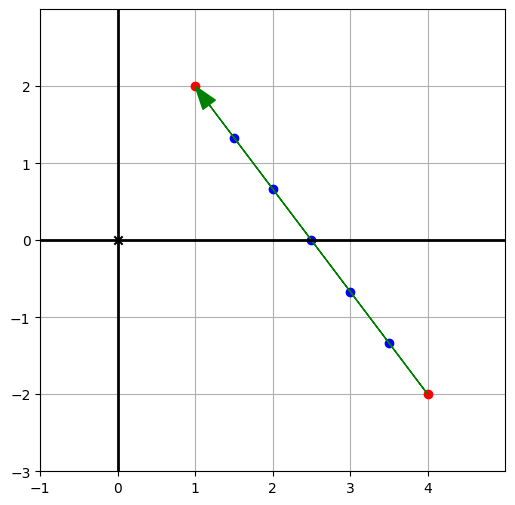

In [1]:
from draw2d import *
from vectors import *

def sample_points(v1, v2, num_points):
    return [add(v1, scale(i/(num_points+1), subtract(v2,v1))) for i in range(1,num_points+1)]

v1 = (1, 2)
v2 = (4, -2)
points = sample_points(v1, v2, 5)
print(points)

draw2d(
    Points2D(v1, v2, color='red'),
    Points2D(*points, color='blue'),
    Arrow2D(v1, v2, color='green')
)

In [2]:
def component(v):
    n = len(v)
    components = []
    for i in range(n):
        c = [0]*n
        c[i] = v[i]
        components.append(tuple(c))
    return components

print(component((1,2,3)))
print(component((1,2,3,4,5)))

[(1, 0, 0), (0, 2, 0), (0, 0, 3)]
[(1, 0, 0, 0, 0), (0, 2, 0, 0, 0), (0, 0, 3, 0, 0), (0, 0, 0, 4, 0), (0, 0, 0, 0, 5)]


In [3]:
# 练习4.10：再考虑对所有坐标执行二次方运算的向量变换
def square(v):
    return tuple(x**2 for x in v)

def cubic(v):
    return tuple(x**3 for x in v)

print(square((1,2,3)))
print(square((-1,2,-3)))

import teapot
from draw_model import *

# draw_model(polygon_map(square, teapot.load_triangles()))
# draw_model(teapot.load_triangles())
draw_model(polygon_map(cubic, teapot.load_triangles()))

(1, 4, 9)
(1, 4, 9)
pygame 2.6.1 (SDL 2.28.4, Python 3.11.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


NameError: name 'quit' is not defined

[(1.5, 2.0)]


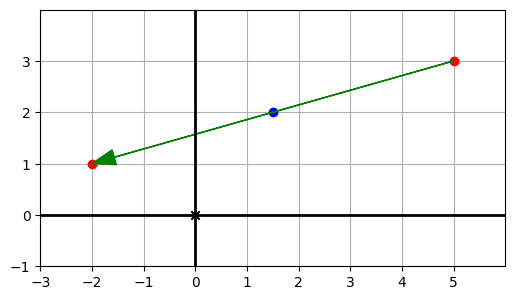

In [4]:
# 练习4.13：(5, 3)和(-2, 1)之间的中点是什么

v1 = (5, 3)
v2 = (-2, 1)
points = sample_points(v1, v2, 1)
print(points)

draw2d(
    Points2D(v1, v2, color='red'),
    Points2D(*points, color='blue'),
    Arrow2D(v2, v1, color='green')
)

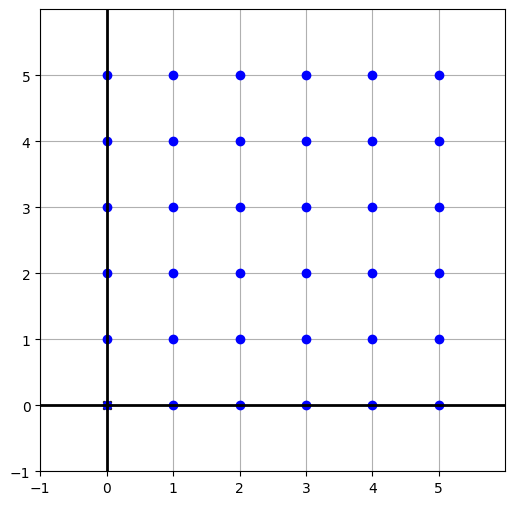

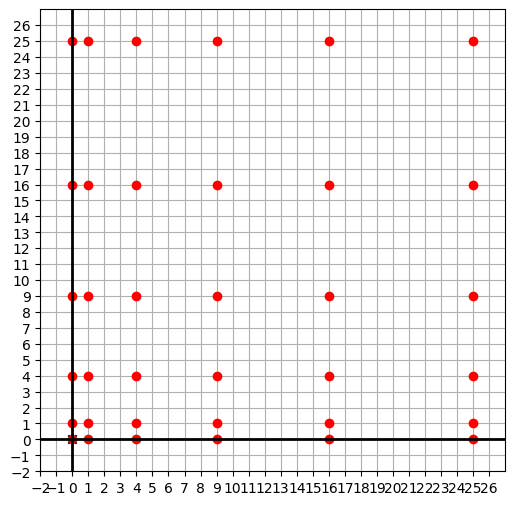

In [5]:
# 练习4.14：非线性变换
points = [(x,y) for x in range(0,6) for y in range(0,6)]
draw2d(Points2D(*points, color='blue'))
draw2d(Points2D(*map(square, points), color='red'))

In [7]:
# 练习4.15：检查向量变换是否是线性的

def test_linear_transform(v):
    return tuple(x*2+1 for x in v)

def test_nonlinear_transform(v):
    return tuple(x**2+1 for x in v)

from hypothesis import given, strategies as st, assume

@st.composite
def build_vector(draw):
    length = draw(st.integers(min_value=2, max_value=10))
    components = [
        draw(st.floats(min_value=-1e64, max_value=1e64, allow_nan=False, allow_infinity=False))
        for _ in range(length)
    ]
    return tuple(components)

@given(build_vector(), build_vector())
def test(v1, v2):
    v3 = add(v1, v2)
    assume(all(abs(x) < 1e65 for x in v3))
    assume(not(all(x == 0 for x in v1) or all(x == 0 for x in v2)))

    print(v1, v2)
    t1 = test_linear_transform(v1)
    t2 = test_linear_transform(v2)
    t3 = test_linear_transform(v3)
    assert equals(add(t1, t2), t3)
    nt1 = test_nonlinear_transform(v1)
    nt2 = test_nonlinear_transform(v2)
    nt3 = test_nonlinear_transform(v3)
    assert not equals(add(nt1, nt2), nt3)

test()

(6.322061904361957e+16, -7.817784040431834e+63, -80.94140906532387, 1.8091887042696504e+16) (-3.5885231217447056e+16, 5586507812203266.0, -6.660637231485636e+16)
(2.5020368709814756e-05, 3.8679493514875704e+16, 3.802511931527176e+16, -5.960464477539063e-08, 6.386544355285216e+63, 3.6561485351523656e+16, 10000000.0, -7.68099348175271e+63, -2.2886288337687536e+16, 6.638614132681528e+63) (1.4059285713700284e+16, 9.880308070285632e+63, 10.0, 9.611991532399458e+63, 4433714638607.455, 1.3823430086660224e+63, 8.03723906456322e+62)
(2.2961931265231584e-51, -2.4299022753758882e+63) (6.587324902321844e+16, 1.6529253812150406e+63, 8.097295338384774e+62, -5.685261150808197e+16)
(-5.264516224850721e-107, -2.225073858507203e-309, -5.848858931577169e+16, 0.1, 4.509978990650951e-69) (1.9110843309697418e-279, 6953140651707495.0, -1.2154856700000473e+63, 1.1369341121805632e+63, -4.2722845082291526e-137, -1.5726234753270629e-302, -1.175494351e-38, -1e+64)
(-5.264516224850721e-107, -2.225073858507203e-309

  + Exception Group Traceback (most recent call last):
  |   File "C:\Users\zchiF\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3699, in run_code
  |     exec(code_obj, self.user_global_ns, self.user_ns)
  |   File "C:\Users\zchiF\AppData\Local\Temp\ipykernel_21020\3209622649.py", line 36, in <module>
  |     test()
  |   File "C:\Users\zchiF\AppData\Local\Temp\ipykernel_21020\3209622649.py", line 21, in test
  |     def test(v1, v2):
  |                    ^^^
  |   File "c:\develop\Python\Python311\Lib\site-packages\hypothesis\core.py", line 2124, in wrapped_test
  |     raise the_error_hypothesis_found
  | ExceptionGroup: Hypothesis found 2 distinct failures. (2 sub-exceptions)
  +-+---------------- 1 ----------------
    | Traceback (most recent call last):
    |   File "C:\Users\zchiF\AppData\Local\Temp\ipykernel_21020\3209622649.py", line 34, in test
    |     assert not equals(add(nt1, nt2), nt3)
    | AssertionError
    | Falsifying exam